# --------------------    Finance Data Project    --------------------
    # This project is challenging as it introduces many new concepts. 
    # You may need to research on your own, but guidance will be provided.


#### This project focuses on exploratory data analysis of "stock prices", 
    # specifically bank stocks, from the 2008 financial crisis to early 2016. 
    # The goal is to practice visualization and pandas skills, 
    # it is not meant to be a robust financial analysis or be taken as financial advice

#### The 2008 financial crisis:
    # The 2008 financial crisis was a major global economic downturn triggered by subprime mortgages, 
    # excessive risk-taking by financial institutions, and regulatory failures. 
    # It led to a stock market crash and an international banking crisis, 

In [1]:
# import libraries
import numpy as np
import pandas as pd

from pandas_datareader import data, wb
import datetime

# We'll use following visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style('whitegrid')

# shows figures in ipynb
%matplotlib inline

# To remove 'warnings' use 'filterwarnings'
import warnings
warnings.filterwarnings('ignore')

### --------  loading provided "pickle file"   --------
    # loading provided "pickle file" of the "stock data from Jan 1st 2006 to Jan 1st 2016"

In [3]:
# provided data is a "pickle" file so read_csv wont work
# Read in the csv file and as a dataframe
# df = pd.read_csv("./data_all_banks")
df = pd.read_pickle("data_all_banks")  # Load a pickle file into a DataFrame

In [ ]:
# data info
df.info()

In [ ]:
# inspect first 5 row
df.head(5)

In [ ]:
df['BAC']

In [ ]:
df['C']

___

## --------  about the Data  --------

In [ ]:
# We need to get data using "pandas datareader". We will get stock information for the following banks:
    # Bank of America
    # CitiGroup
    # Goldman Sachs
    # JPMorgan Chase
    # Morgan Stanley
    # Wells Fargo


# Get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. 
    # Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. 

# This will involve a few steps:
    # 1. Use datetime() to set start and end datetime objects.
    # 2. Figure out the ticker symbol for each bank.
    # 2. Figure out how to use datareader to grab info on the stock.
    #    -  Use Google Finance (or Yahoo Finance)

# Use this documentation: https://pandas-datareader.readthedocs.io/en/latest/remote_data.html


# Use Google Finance (or Yahoo Finance) as a source, for example:
    # Bank of America
    # BAC = data.DataReader("BAC", 'google', start, end)


# NOTE: Check the link above for the latest API (or search online for latest API), as 'google' may not always work.
        # Google Finance no longer provides a public API or support in pandas-datareader. 
        # Use Yahoo Finance, Alpha Vantage, or Market Data API for real-time and historical stock data.


### --------  ONLINE: getting data from "yahoo finance"  --------
    # Note: We're not using this. Instead, we're using "yfinance" in a more straightforward way.


In [ ]:
# Note: We're not using this. Instead, we're using "yfinance" in a more straightforward way.
import datetime
import pandas as pd
import pandas_datareader.data as data

# Define start and end dates
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

# Define bank tickers
# Create a list of the "ticker symbols" (as strings) in alphabetical order. 
    # Call this list: "tickers"
tickers = ['BAC', 'CTG', 'GS', 'JPM', 'MS', 'WFC']

# Fetch data for each bank using "Yahoo Finance" since 
BAC = data.DataReader("BAC", 'yahoo', start, end)       # Bank of America
CTG = data.DataReader("CTG", 'yahoo', start, end)       # CitiGroup
GS = data.DataReader("GS", 'yahoo', start, end)     # Goldman Sachs
JPM = data.DataReader("JPM", 'yahoo', start, end)       # JPMorgan Chase
MS = data.DataReader("MS", 'yahoo', start, end)     # Morgan Stanley
WFC = data.DataReader("WFC", 'yahoo', start, end)       # Wells Fargo

# Fetch data for all banks in a single call
df = data.DataReader(tickers, 'yahoo', start, end)

# Fetcing could also do this for a "Panel Object"
# df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'], 'yahoo', start, end)

# ----------------    Concatenate dataframes    ----------------
# Concatenate dataframes into a single dataframe:
# Use "pd.concat" to concatenate the bank dataframes together to a single dataframe called bank_stocks
    # Set the keys argument equal to the "tickers" list. 
    # Also pay attention to what axis you concatenate on.
bank_stocks = pd.concat([BAC, CTG, GS, JPM, MS, WFC], axis=1, keys=tickers)

# Set column name levels
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']

# Display the head of the dataframe
print(bank_stocks.head())

# Save as a pickle file for efficient storage
import pickle
with open("bank_stocks_yahoo.pkl", 'wb') as f:
    pickle.dump(bank_stocks, f)

## --------  ALTERNATIVE(online): getting data from "yfinance"  --------

In [17]:

# Install yfinance from PYPI using pip
    # pip install yfinance
    # https://yfinance-python.org/
    # https://github.com/ranaroussi/yfinance

# check first: Use "yfinance" Directly Instead of "pandas_datareader"
    # This method bypasses "pandas_datareader" and directly uses "yfinance", which is more reliable.
    # If this works, it means yfinance is functioning properly.
import yfinance as yf
import datetime

# Define start and end dates
start = datetime.datetime(2023, 1, 1)
end = datetime.datetime(2024, 1, 1)

# Fetch stock data directly using yfinance
df = yf.download("AAPL", start=start, end=end)

# Display the first few rows
print(df.head())
# ------------------------------------------------

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2023-01-03  123.632530  129.395518  122.742873  128.782649  112117500
2023-01-04  124.907692  127.181260  123.642405  125.431599   89113600
2023-01-05  123.583099  126.301493  123.326093  125.668849   80962700
2023-01-06  128.130219  128.792516  123.454587  124.561717   87754700
2023-01-09  128.654144  131.876686  128.397138  128.970474   70790800


### ----------------    now we get our DataSet    ----------------

In [20]:
# ----------------    now we get our DataSet    ----------------
import datetime
import pandas as pd
import yfinance as yf

# Define start and end dates
start = "2006-01-01"
end = "2016-01-01"

# Define bank tickers
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']  # Fixed 'CTG' -> 'C' for CitiGroup

# Fetch data for all banks using yfinance
bank_data = {ticker: yf.download(ticker, start=start, end=end) for ticker in tickers}

# Concatenate dataframes into a single dataframe with MultiIndex
bank_stocks = pd.concat(bank_data, axis=1, keys=tickers)

# Display the first few rows
bank_stocks.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BAC                                                      C  \
Price           Close       High        Low       Open    Volume       Close   
Ticker            BAC        BAC        BAC        BAC       BAC           C   
Date                                                                           
2006-01-03  31.173681  31.239895  30.557888  31.067736  16296700  324.013123   
2006-01-04  30.842604  31.279618  30.756524  31.120702  17757900  318.031219   
2006-01-05  30.882324  31.008133  30.670439  30.842597  14970700  319.608795   
2006-01-06  30.835981  31.061110  30.690309  30.988274  12599800  319.608795   
2006-01-09  30.855854  31.100849  30.696941  30.935313  15619400  318.096985   

                                                         ...         MS  \
Price             High         Low        Open   Volume  ...      Close   
Ticker               C           C           C        C  ...         MS   
Date                                                     ...              
2006-01-03  324.604743  316.256273  322.106780  1537600  ...  32.190899   
2006-01-04  322.764226  317.834019  321.186564  1870960  ...  32.212990   
2006-01-05  320.660556  318.162594  318.425534  1143160  ...  32.301331   
2006-01-06  321.449397  316.847872  321.317917  1370210  ...  32.334457   
2006-01-09  320.397748  317.505364  319.477447  1680740  ...  32.676735   

                                                            WFC             \
Price            High        Low       Open   Volume      Close       High   
Ticker             MS         MS         MS       MS        WFC        WFC   
Date                                                                         
2006-01-03  32.290271  31.324157  31.561543  5377000  18.778112  18.822262   
2006-01-04  32.726410  32.212990  32.406214  7977800  18.560308  18.731018   
2006-01-05  32.345497  32.030820  32.323414  5778000  18.539709  18.575028   
2006-01-06  32.489035  32.047383  32.444871  6889800  18.648602  18.704523   
2006-01-09  32.731943  32.362058  32.367580  4144500  18.645660  18.733960   

                                            
Price             Low       Open    Volume  
Ticker            WFC        WFC       WFC  
Date                                        
2006-01-03  18.363110  18.601516  11016400  
2006-01-04  18.463180  18.719245  10870000  
2006-01-05  18.430807  18.542652  10158000  
2006-01-06  18.474948  18.589736   8403800  
2006-01-09  18.575022  18.645660   5619600  

[5 rows x 30 columns]

In [21]:
# Note that: we can't set the multi-level index as before because "bank_stocks" has three levels instead of two. 
    # This happens since "yfinance.download()" already returns a "MultiIndex" with Stock Info (Open/Close) and Ticker, 
    # and concatenating adds another level.

# we use following way ----
# Check the number of levels in the MultiIndex
print(bank_stocks.columns.nlevels)  # Should print 3

# Drop the extra level by resetting the column index
bank_stocks.columns = bank_stocks.columns.droplevel(2)  # Drops the repeated ticker level
bank_stocks.head()  # Display the change

3


BAC                                                      C  \
Price           Close       High        Low       Open    Volume       Close   
Date                                                                           
2006-01-03  31.173681  31.239895  30.557888  31.067736  16296700  324.013123   
2006-01-04  30.842604  31.279618  30.756524  31.120702  17757900  318.031219   
2006-01-05  30.882324  31.008133  30.670439  30.842597  14970700  319.608795   
2006-01-06  30.835981  31.061110  30.690309  30.988274  12599800  319.608795   
2006-01-09  30.855854  31.100849  30.696941  30.935313  15619400  318.096985   

                                                         ...         MS  \
Price             High         Low        Open   Volume  ...      Close   
Date                                                     ...              
2006-01-03  324.604743  316.256273  322.106780  1537600  ...  32.190899   
2006-01-04  322.764226  317.834019  321.186564  1870960  ...  32.212990   
2006-01-05  320.660556  318.162594  318.425534  1143160  ...  32.301331   
2006-01-06  321.449397  316.847872  321.317917  1370210  ...  32.334457   
2006-01-09  320.397748  317.505364  319.477447  1680740  ...  32.676735   

                                                            WFC             \
Price            High        Low       Open   Volume      Close       High   
Date                                                                         
2006-01-03  32.290271  31.324157  31.561543  5377000  18.778112  18.822262   
2006-01-04  32.726410  32.212990  32.406214  7977800  18.560308  18.731018   
2006-01-05  32.345497  32.030820  32.323414  5778000  18.539709  18.575028   
2006-01-06  32.489035  32.047383  32.444871  6889800  18.648602  18.704523   
2006-01-09  32.731943  32.362058  32.367580  4144500  18.645660  18.733960   

                                            
Price             Low       Open    Volume  
Date                                        
2006-01-03  18.363110  18.601516  11016400  
2006-01-04  18.463180  18.719245  10870000  
2006-01-05  18.430807  18.542652  10158000  
2006-01-06  18.474948  18.589736   8403800  
2006-01-09  18.575022  18.645660   5619600  

[5 rows x 30 columns]

In [22]:
# Now correctly assign MultiIndex column names
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']

# Display the fixed columns
bank_stocks.head()

Bank Ticker        BAC                                                      C  \
Stock Info       Close       High        Low       Open    Volume       Close   
Date                                                                            
2006-01-03   31.173681  31.239895  30.557888  31.067736  16296700  324.013123   
2006-01-04   30.842604  31.279618  30.756524  31.120702  17757900  318.031219   
2006-01-05   30.882324  31.008133  30.670439  30.842597  14970700  319.608795   
2006-01-06   30.835981  31.061110  30.690309  30.988274  12599800  319.608795   
2006-01-09   30.855854  31.100849  30.696941  30.935313  15619400  318.096985   

Bank Ticker                                               ...         MS  \
Stock Info         High         Low        Open   Volume  ...      Close   
Date                                                      ...              
2006-01-03   324.604743  316.256273  322.106780  1537600  ...  32.190899   
2006-01-04   322.764226  317.834019  321.186564  1870960  ...  32.212990   
2006-01-05   320.660556  318.162594  318.425534  1143160  ...  32.301331   
2006-01-06   321.449397  316.847872  321.317917  1370210  ...  32.334457   
2006-01-09   320.397748  317.505364  319.477447  1680740  ...  32.676735   

Bank Ticker                                                  WFC             \
Stock Info        High        Low       Open   Volume      Close       High   
Date                                                                          
2006-01-03   32.290271  31.324157  31.561543  5377000  18.778112  18.822262   
2006-01-04   32.726410  32.212990  32.406214  7977800  18.560308  18.731018   
2006-01-05   32.345497  32.030820  32.323414  5778000  18.539709  18.575028   
2006-01-06   32.489035  32.047383  32.444871  6889800  18.648602  18.704523   
2006-01-09   32.731943  32.362058  32.367580  4144500  18.645660  18.733960   

Bank Ticker                                  
Stock Info         Low       Open    Volume  
Date                                         
2006-01-03   18.363110  18.601516  11016400  
2006-01-04   18.463180  18.719245  10870000  
2006-01-05   18.430807  18.542652  10158000  
2006-01-06   18.474948  18.589736   8403800  
2006-01-09   18.575022  18.645660   5619600  

[5 rows x 30 columns]

In [23]:
# ----    save as pickle    ----
# to_pickle() comes from "pandas". 
    # It is a method available for pandas "DataFrames" and "Series", 
    # allowing you to serialize and save data in "pickle" format
bank_stocks.to_pickle("bank_stocks_yahoo.pkl")

___

## ----------------    EDA    ----------------
    # EDA stands for Exploratory Data Analysis. 
    # It involves analyzing and visualizing datasets to understand 
        # patterns, trends, and relationships before applying further data processing or modeling.

In [2]:
# ----  load the pickle dataset  ----
df1 = pd.read_pickle("bank_stocks_yahoo.pkl")  # Load a pickle file into a DataFrame

In [ ]:
# data info
df1.info()

In [ ]:
# inspect first 5 row
df1.head()

In [ ]:
# The DataFrame has a multi-level index:
    # 6 banks at the first level.
    # Each bank has 2517 rows and 5 columns
print("--------    BAC    --------\n", df1['BAC'])
print("--------    C    --------\n", df1['C'])

### ----    cross-section (xs)    ----

In [ ]:
# Check the column index levels
print(df1.columns)  # This will show the structure of the MultiIndex columns

# DataFrame has a two-level MultiIndex for columns:
    # Level 0: Bank Ticker (BAC, C, GS, etc.)
    # Level 1: Stock Info (Close, High, Low, etc.)

In [3]:
# returns cross-section of row(s) or column(s) in multi-indexed dataframe
    # axis=0: Operate on rows (index-wise)
    # axis=1: Operate on columns (column-wise)
close_prices = df1.xs('Close', level="Stock Info", axis=1) # 'Close' valuse for all 6 banks

In [ ]:
# What is the max Close price for each bank's stock throughout the time period?
max_close_prices = close_prices.max()
print(max_close_prices)

In [ ]:
# in single line
df1.xs(key='Close',axis=1,level='Stock Info').max()

### ------------    calculate RETURNS    ------------
    # Create a new empty DataFrame called "returns" for daily return percentages for each bank's stock.
    # This dataframe will contain the returns for each bank's stock. 

In [4]:
returns = pd.DataFrame()

# LATEX note: 
    # block level math $$...$$ and \[...\]
    # inline math $...$ and \(...\)

### returns are typically defined by:
$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$
Where $p_t$ is today's price and $p_{t-1}$ is the previous day's price.

In [5]:
# Use .pct_change() to compute daily returns for each bank's "Close" price.
# Store the results in "returns".
for bank in close_prices.columns:
    returns[bank+' return'] = close_prices[bank].pct_change()

In [7]:
returns.head()

,BAC return,C return,GS return,JPM return,MS return,WFC return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013813,-0.005771,0.000686,-0.011599
2006-01-05,0.001288,0.004960,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014168,0.007046,0.001026,0.005873
2006-01-09,0.000644,-0.004730,0.012030,0.016242,0.010586,-0.000158


#### about pct_change(): 
    # It is fractional change between the current and a prior element.
    # Computes the fractional change from the immediately previous row by default. 
    # This is useful in comparing the fraction of change in a time series of elements.

In [ ]:
# Create a pairplot using seaborn from "returns" data 
import seaborn as sns
sns.pairplot(returns[1:])

In [ ]:
sns.pairplot(returns[1:], diag_kws={'bins': 30})  # Set bins to 30

## Which stock stands out, and how can we determine why?

In [7]:
# How to Identify the Best/Worst Performing Stock?

# --------  Calculate Summary Statistics  --------
#     Use .mean() to get the average return.
#     Use .std() to check volatility (higher standard deviation means more risk).

returns.mean()

BAC return    0.000341
C return     -0.000098
GS return     0.000497
JPM return    0.000675
MS return     0.000550
WFC return    0.000760
dtype: float64

In [8]:
returns.std()

BAC return    0.036659
C return      0.038672
GS return     0.025386
JPM return    0.027675
MS return     0.037717
WFC return    0.030195
dtype: float64

In [9]:
# Find the Best/Worst Performing Stock:
    # The highest mean return -> Best-performing stock.
    # The lowest mean return -> Worst-performing stock.

best_stock = returns.mean().idxmax()
worst_stock = returns.mean().idxmin()
print(f"Best performing stock: {best_stock}")
print(f"Worst performing stock: {worst_stock}")

Best performing stock: WFC return
Worst performing stock: C return


In [ ]:
# Visualize Returns:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 16))
sns.boxplot(data=returns)
plt.title("Stock Return Distribution")
plt.show()

In [ ]:
# -------------  subplots  -------------
# Below is a subplots-based visualization that separately plots histograms with 
    # KDE (Kernel Density Estimation) and 
    # standard deviation (std) lines 
# for each bank in the returns DataFrame.

# Histogram & KDE are plotted together (sns.histplot() with kde=True).
# Standard deviation lines are drawn using ax.axvline().

# Handles multiple banks dynamically (for i, bank in enumerate(returns.columns)).

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define number of banks (columns in 'returns')
num_banks = len(returns.columns)

# Create subplots: one row per bank
fig, axes = plt.subplots(num_banks, 1, figsize=(10, 3 * num_banks))

# Loop through each bank and plot histogram with KDE & std
for i, bank in enumerate(returns.columns):
    ax = axes[i] if num_banks > 1 else axes  # Handle single subplot case
    
    # Plot histogram & KDE
    sns.histplot(returns[bank], kde=True, bins=30, ax=ax)
    
    # Compute mean & standard deviation
    mean_val = returns[bank].mean()
    std_val = returns[bank].std()
    
    # Draw standard deviation lines
    ax.axvline(mean_val, color='red', linestyle='--', label='Mean')
    ax.axvline(mean_val + std_val, color='blue', linestyle='--', label='±1 Std')
    ax.axvline(mean_val - std_val, color='blue', linestyle='--')
    
    ax.set_title(f"Returns Distribution for {bank}")
    ax.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

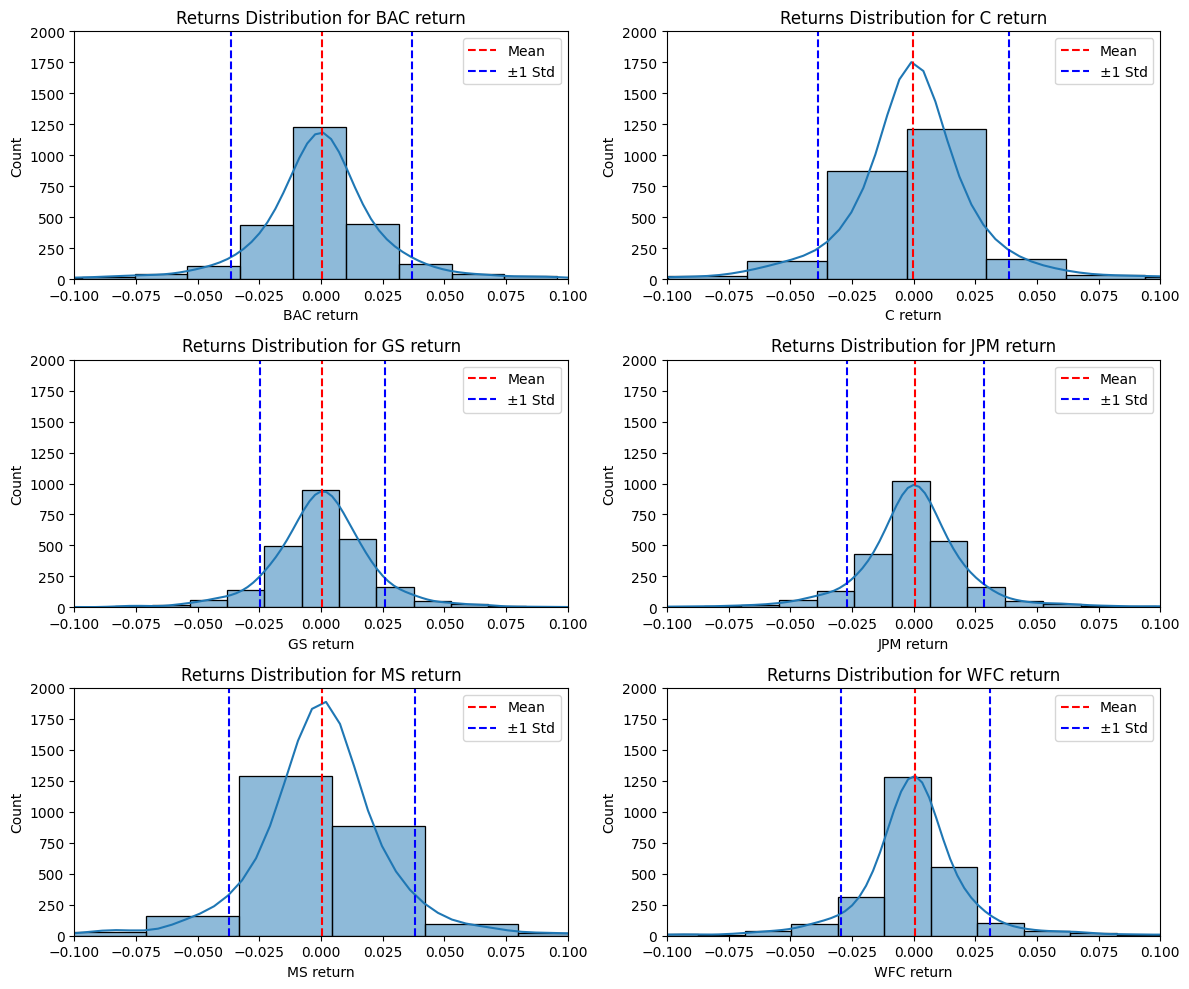

In [11]:
# -------------  subplot (same scale)  -------------
# Volatility: A high standard deviation may indicate a riskier stock.

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define number of banks (columns in 'returns')
num_banks = len(returns.columns)

# Define subplot grid (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# Flatten axes array for easier indexing
axes = axes.flatten()

# Fixed x, y axis range
x_min, x_max = -0.1, 0.1
y_min, y_max = 0, 2000

# Loop through each bank and plot histogram with KDE & std
for i, bank in enumerate(returns.columns):
    ax = axes[i]

    # Plot histogram & KDE
    sns.histplot(returns[bank], kde=True, bins=30, ax=ax)
    
    # Compute mean & standard deviation
    mean_val = returns[bank].mean()
    std_val = returns[bank].std()
    
    # Draw standard deviation lines
    ax.axvline(mean_val, color='red', linestyle='--', label='Mean')
    ax.axvline(mean_val + std_val, color='blue', linestyle='--', label='±1 Std')
    ax.axvline(mean_val - std_val, color='blue', linestyle='--')
    
    # Set title and x-axis limits
    ax.set_title(f"Returns Distribution for {bank}")
    ax.set_xlim(x_min, x_max)  # Fixed x-axis range
    ax.set_ylim(y_min, y_max)  # Fixed y-axis range
    ax.legend()

# Hide unused subplots if num_banks < 6
for i in range(num_banks, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and show plot
plt.tight_layout()
plt.show()


## --------  best and worst single day returns  --------

In [2]:
# short "returns" processing. Now we use the "old pickle" from google
df1 = pd.read_pickle("data_all_banks")  # Load a pickle file into a DataFrame
close_prices = df1.xs('Close', level="Stock Info", axis=1) # 'Close' valuse for all 6 banks

returns = pd.DataFrame()
for bank in close_prices.columns:
    returns[bank+' return'] = close_prices[bank].pct_change()

#### Identify the dates on which each bank stock had the "highest" (best) and "lowest" (worst) single-day returns.


In [4]:
for bank in returns.columns:
    max_return_date = returns[bank].idxmax()
    min_return_date = returns[bank].idxmin()
    max_return = returns[bank].loc[max_return_date]
    min_return = returns[bank].loc[min_return_date]

    print(f"{bank}:")
    print(f"  Best Day:   {max_return_date.date()} — Return: {max_return:.4f}")
    print(f"  Worst Day:  {min_return_date.date()} — Return: {min_return:.4f}")
    print()

BAC return:
  Best Day:   2009-04-09 — Return: 0.3527
  Worst Day:  2009-01-20 — Return: -0.2897

C return:
  Best Day:   2011-05-09 — Return: 8.7699
  Worst Day:  2011-05-06 — Return: -0.8991

GS return:
  Best Day:   2008-11-24 — Return: 0.2647
  Worst Day:  2009-01-20 — Return: -0.1896

JPM return:
  Best Day:   2009-01-21 — Return: 0.2510
  Worst Day:  2009-01-20 — Return: -0.2073

MS return:
  Best Day:   2008-10-13 — Return: 0.8698
  Worst Day:  2008-10-09 — Return: -0.2589

WFC return:
  Best Day:   2008-07-16 — Return: 0.3276
  Worst Day:  2009-01-20 — Return: -0.2382



In [ ]:
# Notie: Four of the banks experienced their worst drop on the same date. 
#           it is "2009-01-20" and the banks are BAC, GS, JPM, WFC
#       Investigate whether a significant event occurred on that day.

### Significant Drop in Bank Stocks — January 20, 2009

On **January 20, 2009**, four major U.S. banks —  
**Bank of America (BAC)**, **Goldman Sachs (GS)**, **JPMorgan Chase (JPM)**, and **Wells Fargo (WFC)** — experienced their **worst single-day stock return** in the dataset.

This sharp decline coincided with the **inauguration of President Barack Obama**, suggesting that the market downturn occurred during a period of heightened uncertainty and stress in the financial sector.

In [5]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

BAC return   2009-01-20
C return     2011-05-06
GS return    2009-01-20
JPM return   2009-01-20
MS return    2008-10-09
WFC return   2009-01-20
dtype: datetime64[ns]

In [6]:
# Best Single Day Gain
# citigroup stock split in May 2011, but also JPM day after inauguration.
returns.idxmax()

BAC return   2009-04-09
C return     2011-05-09
GS return    2008-11-24
JPM return   2009-01-21
MS return    2008-10-13
WFC return   2008-07-16
dtype: datetime64[ns]

### Citigroup Reverse Stock Split – May 2011

In **May 2011**, Citigroup carried out a **1-for-10 reverse stock split**, meaning every **10 existing shares** were combined into **1 new share**. This reduced the number of outstanding shares from about **29 billion to 2.9 billion**.

- **Effective Date:** The split became official after the market closed on **May 6, 2011**, and trading resumed with adjusted prices on **May 9, 2011**.
- **Purpose:** The move aimed to raise the share price and make the stock more attractive to institutional investors.
- **Dividend Reinstated:** Citigroup also resumed a **quarterly dividend of $0.01** per share, the first since 2009.


## ----  riskiest stock  ----
#### Overall Risk: 
    # Check the "standard deviation" of returns for each stock over the full time period. 
    # A higher value indicates more volatility (i.e., higher risk).

#### Risk in 2015: 
    # Repeat the same analysis, but only using data from 2015 to see which stock was the most volatile that year.

In [3]:
# Overall standard deviation (entire time period)
overall_std = returns.std().sort_values(ascending=False)
print("Standard Deviation - Entire Period:")
print(overall_std)

Standard Deviation - Entire Period:
C return      0.179969
MS return     0.037820
BAC return    0.036650
WFC return    0.030233
JPM return    0.027656
GS return     0.025346
dtype: float64


In [6]:
# Standard deviation for the year 2015
returns_2015 = returns['2015']
std_2015 = returns_2015.std().sort_values(ascending=False)
print("\nStandard Deviation - Year 2015:")
print(std_2015)


Standard Deviation - Year 2015:
MS return     0.016249
BAC return    0.016163
C return      0.015289
GS return     0.014046
JPM return    0.014017
WFC return    0.012591
dtype: float64


<AxesSubplot:xlabel='MS return', ylabel='Density'>

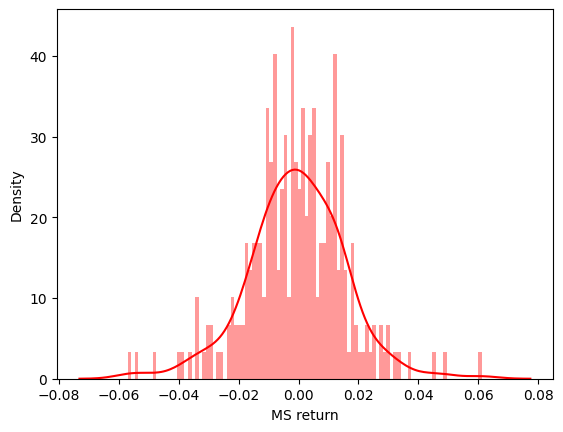

In [22]:
sns.distplot(returns['2015']['MS return'], bins=100, color='red', kde=True)

<AxesSubplot:xlabel='MS return', ylabel='Count'>

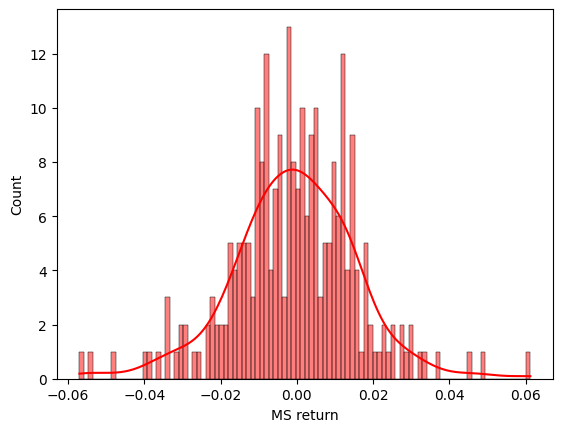

In [18]:
ms_ret = returns['2015']['MS return']
sns.histplot(ms_ret, bins=100, color='red', kde=True)

<AxesSubplot:xlabel='C return', ylabel='Count'>

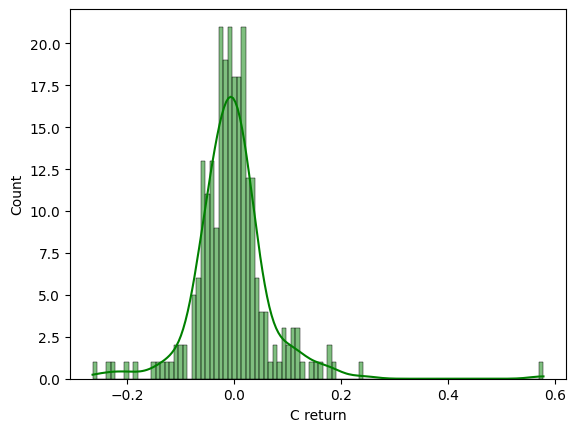

In [17]:
c_ret = returns['2008']['C return']
sns.histplot(c_ret, bins=100, color='green', kde=True)

___

# ----------------    more VISUALIZATION    ----------------
- This project emphasizes visualizations. You can use any library you prefer—like 
- Seaborn, Matplotlib, Plotly, Cufflinks, or even just Pandas—to recreate the plots described below.

### Visualize Close prices of all Banks in line plot
- Create a line plot to show the Close prices of all banks over time.
- Tip: Use a loop or .xs() to extract Close prices for each bank.

In [2]:
# We'll use the "old pickle" from google
df1 = pd.read_pickle("data_all_banks")  # Load a pickle file into a DataFrame
close_prices = df1.xs('Close', level="Stock Info", axis=1) # 'Close' valuse for all 6 banks

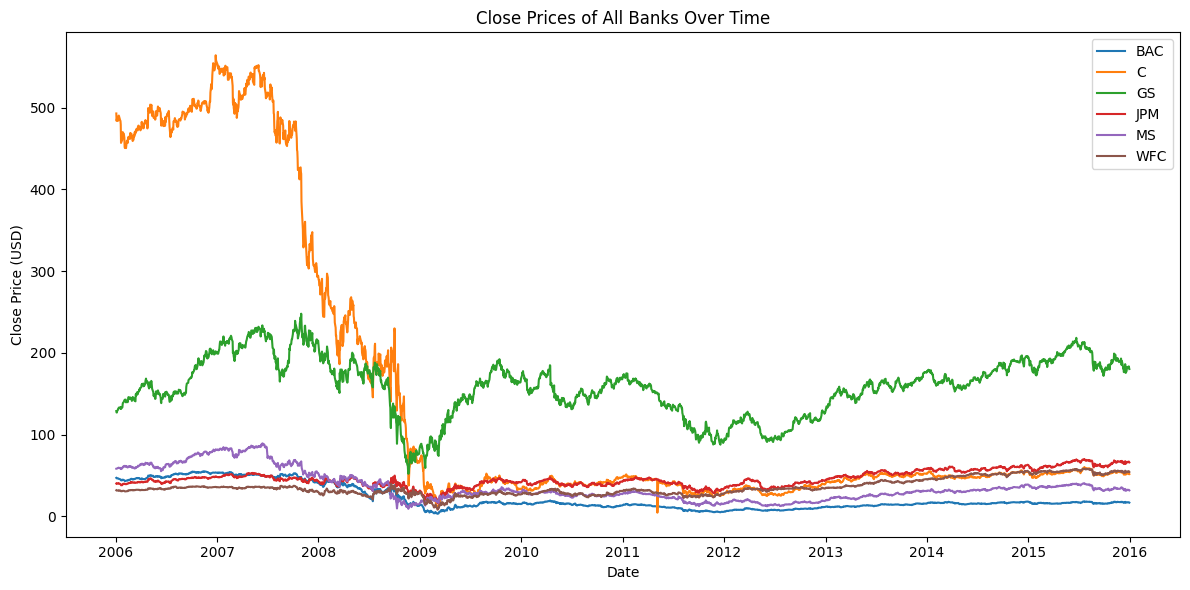

In [5]:
# Plot using matplotlib
plt.figure(figsize=(12, 6))

for bank in close_prices.columns:
    plt.plot(close_prices.index, close_prices[bank], label=bank)

plt.title("Close Prices of All Banks Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.tight_layout()
plt.show()

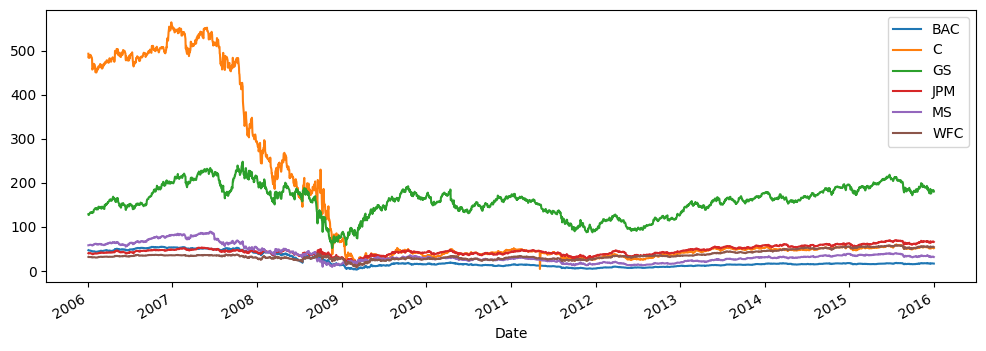

In [9]:
# alternative code
for bank in close_prices.columns:
    close_prices[bank].plot(figsize=(12,4),label=bank)
plt.legend()

<AxesSubplot:xlabel='Date'>

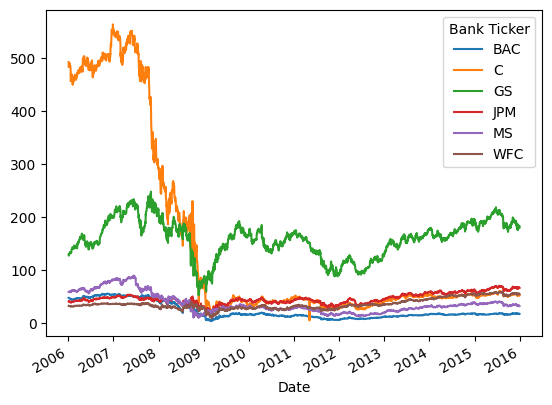

In [10]:
# alternative: directly from DataFrame
df1.xs(key='Close', axis=1, level='Stock Info').plot()

# ----  Moving Averages  ----
### Whats a moving avearge? 
### Is it a type of sliding window technique, and is it also used during the training of machine learning (ML), deep learning (DL), or reinforcement learning (RL) models?

In [ ]:
close_prices['BAC']['2008']

In [ ]:
close_prices['BAC']['2008-01-01':'2009-01-01']

In [8]:
# BAC's close in 2008
bac_close_2008 = close_prices['BAC']['2008']

# Compute 30-day moving average
bac_rolling_30 = bac_close_2008.rolling(window=30).mean()

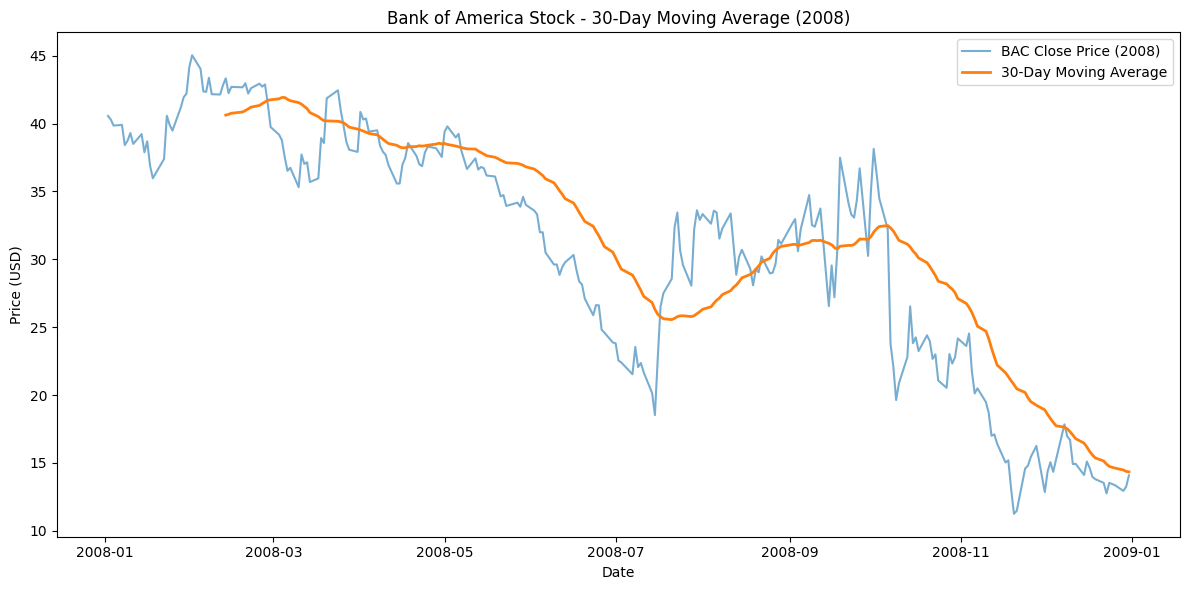

In [9]:
# Plotting
plt.figure(figsize=(12, 6))

plt.plot(bac_close_2008, label='BAC Close Price (2008)', alpha=0.6)
plt.plot(bac_rolling_30, label='30-Day Moving Average', linewidth=2)

plt.title('Bank of America Stock - 30-Day Moving Average (2008)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.tight_layout()
plt.show()

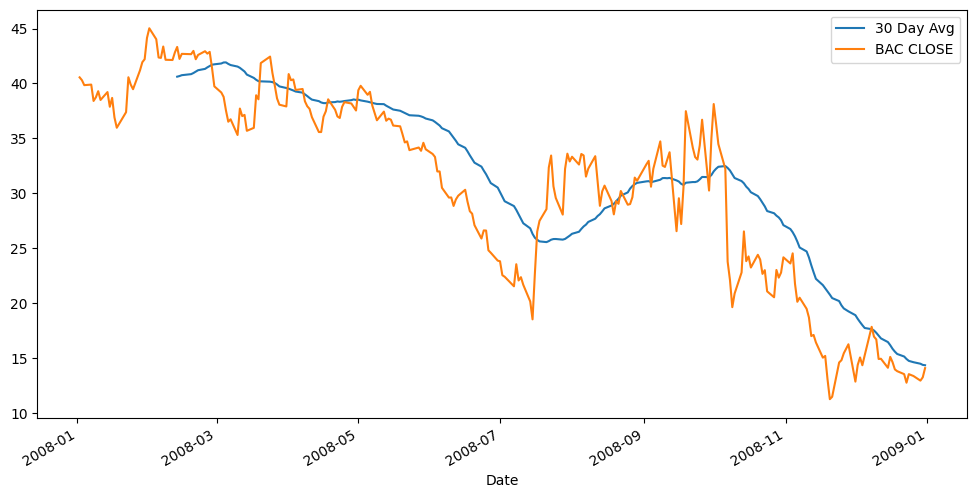

In [10]:
# ALTERNATIVE: Using "ix"
plt.figure(figsize=(12,6))
close_prices['BAC']['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
close_prices['BAC']['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

## ----  heatmap and clustermap  ----

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

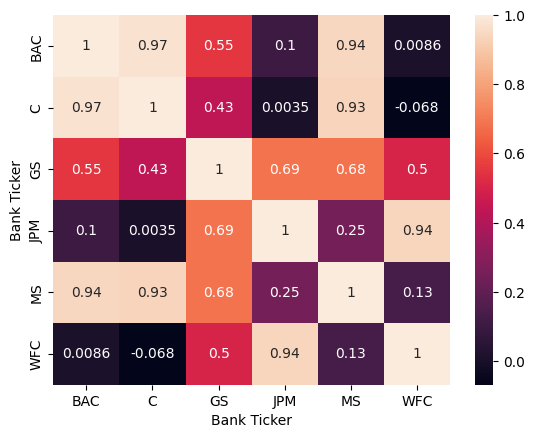

In [3]:
sns.heatmap(df1.xs(key='Close',axis=1,level='Stock Info').corr(), annot=True)

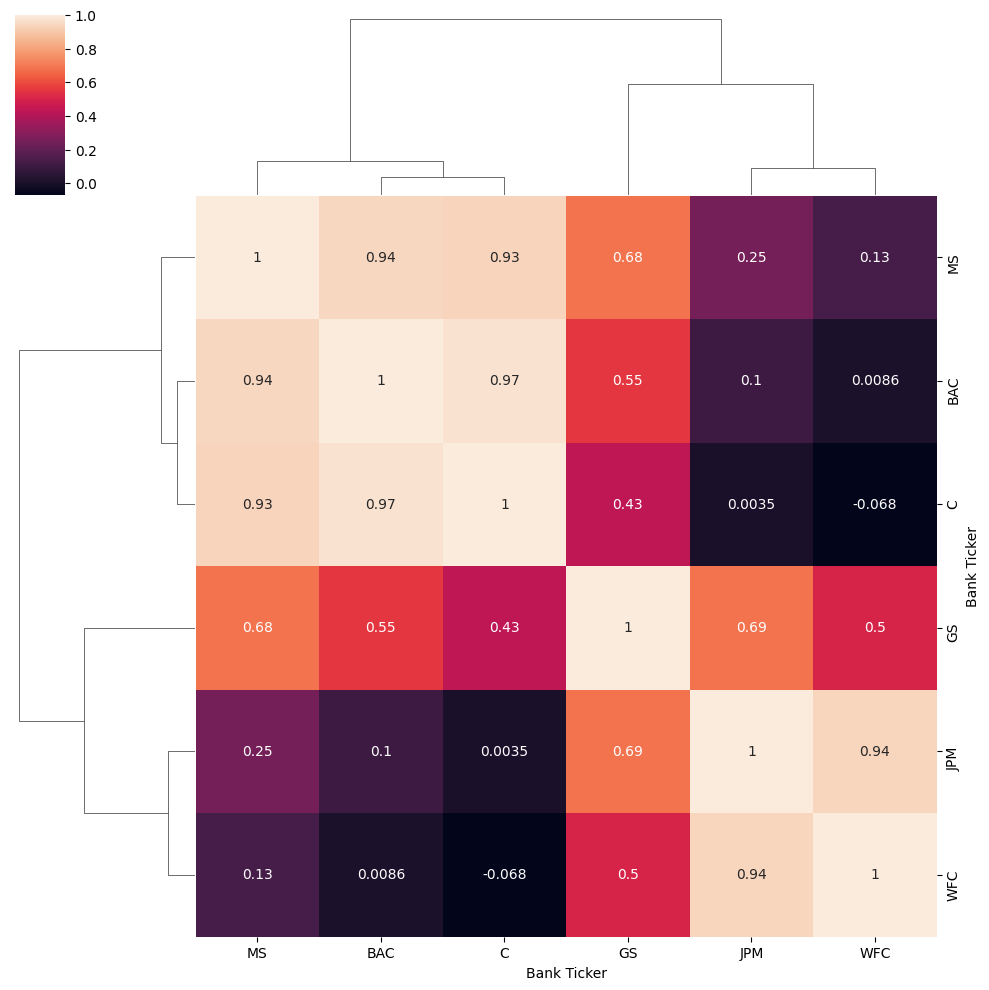

In [4]:
# Clustermap to cluster the correlations:
sns.clustermap(close_prices.corr(),annot=True)

## ----    cufflinks: using local "Plotly.js"   ----
#### use 'cdn' or 'plotly-2.35.2.min.js in working directory'
    # The HTML file's large size is primarily due to the embedded Plotly.js.
    # we can download "Plotly.js" to our working directory and reference it locally.
    # pio.write_html(fig, 'plot_local_plotly_js.html', include_plotlyjs='.\plotly-2.35.2.min.js')

In [5]:
import cufflinks as cf
import plotly.io as pio
from plotly.offline import iplot

In [6]:
close_corr = df1.xs(key='Close', axis=1, level='Stock Info').corr()

In [8]:
fig1 = close_corr.iplot(kind='heatmap', colorscale='RdBu', title='Heatmap Example')

In [13]:
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
import pandas as pd

# Initialize notebook mode
init_notebook_mode(connected=True)

# Example Data
corr = close_corr

# Heatmap figure
fig = go.Figure(data=go.Heatmap(
    z=corr.values,
    x=corr.columns,
    y=corr.columns,
    colorscale='Viridis'
))

# Plot offline inside notebook
iplot(fig)

In [14]:
# save to html
pio.write_html(fig, 'stock_fig1_heatmap.html', include_plotlyjs='.\plotly-2.35.2.min.js')